## THE SPARKS FOUNDATION

### GRIP INTENSHIP - JUNE 2021

### Author: Doddi Guna Venkat

### Task : Detection of Face Mask

In [1]:
#importing required libraries

from tensorflow import keras
from keras.applications.vgg16 import VGG16
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import os,shutil
import cv2

Using TensorFlow backend.


**I have created directories to store my data in training data consisting of 1500 images and validation data of 500 images**

**You can skip this step and use original data I used this method so CPU memory consumption to be as low as possible**

- os.mkdir('./train')
- os.mkdir('./train/mask')
- os.mkdir('./train/no_mask')

- fnames = [f'with_mask_{i}.jpg' for i in range(1,1500)]
- for fname in fnames:
    - src = os.path.join('.\\data\\with_mask',fname)
    - dst = os.path.join('.\\train\\mask',fname)
    - shutil.copy(src,dst)
- fnames = [f'without_mask_{i}.jpg' for i in range(1,1500)]
- for fname in fnames:
    - src = os.path.join('.\\data\\without_mask',fname)
    - dst = os.path.join('.\\train\\no_mask',fname)
    - shutil.copy(src,dst)

- os.mkdir('./validation')
- os.mkdir('./validation/mask')
- os.mkdir('./validation/no_mask')

- fnames = [f'with_mask_{i}.jpg' for i in range(1002,1252)]
- for fname in fnames:
    - src = os.path.join('.\\data\\with_mask',fname)
    - dst = os.path.join('.\\validation\\mask',fname)
    - shutil.copy(src,dst)
- fnames = [f'without_mask_{i}.jpg' for i in range(1002,1252)]
- for fname in fnames:
    - src = os.path.join('.\\data\\without_mask',fname)
    - dst = os.path.join('.\\validation\\no_mask',fname)
    - shutil.copy(src,dst)

In [2]:
# using Data Augmetation(i.e using Image Generator for continously generate data)

train_datagen = ImageDataGenerator(rescale=1./255,
                                   vertical_flip=True,     # for train data generator I rescaled, applied rotation,
                                   zoom_range=0.2,         # zoom range for generating more training samples for same data
                                   validation_split=0.25,
                                   shear_range=0.2,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  rotation_range=40,
                                  fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)          # In test data generator we only rescale

In [3]:
train_generator = train_datagen.flow_from_directory('./train',
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')    #class mode is binary since we have only 2 classes

validation_generator = test_datagen.flow_from_directory('./validation',
                                                       target_size=(150,150),
                                                       class_mode='binary')

Found 2002 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [4]:
# using pre-trained Neural Network (VGG16)

conv_base = VGG16(weights='imagenet',
                include_top=False,
                input_shape=(150,150,3))

In [5]:
conv_base.summary() # summary of model

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [6]:
# fine tuning the last 3 layers in VGG16 model

conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else :
        layer.trainable = False

In [8]:
# model

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
Dropout(0.5)
model.add(Dense(1,activation='sigmoid')) # output must be in between 0 or 1, so activation is 'sigmoid'

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [10]:
# compiling the model

model.compile(optimizer=optimizers.RMSprop(lr=1e-5),
             loss='binary_crossentropy',
             metrics=['acc'])

In [11]:
# training the model

history = model.fit_generator(train_generator,
                             epochs=10,
                             steps_per_epoch=100,
                             validation_data=validation_generator)

Epoch 1/10
100/100 [==============================] - 308s 3s/step - loss: 0.3621 - acc: 0.8522 - val_loss: 0.2030 - val_acc: 0.9100
Epoch 2/10
100/100 [==============================] - 309s 3s/step - loss: 0.1790 - acc: 0.9253 - val_loss: 0.0558 - val_acc: 0.9560
Epoch 3/10
100/100 [==============================] - 310s 3s/step - loss: 0.1314 - acc: 0.9511 - val_loss: 0.0830 - val_acc: 0.9560
Epoch 4/10
100/100 [==============================] - 311s 3s/step - loss: 0.1001 - acc: 0.9591 - val_loss: 0.0335 - val_acc: 0.9740
Epoch 5/10
100/100 [==============================] - 313s 3s/step - loss: 0.0921 - acc: 0.9657 - val_loss: 0.0059 - val_acc: 0.9740
Epoch 6/10
100/100 [==============================] - 327s 3s/step - loss: 0.0829 - acc: 0.9692 - val_loss: 0.1135 - val_acc: 0.9700
Epoch 7/10
100/100 [==============================] - 310s 3s/step - loss: 0.0745 - acc: 0.9717 - val_loss: 0.0431 - val_acc: 0.9680
Epoch 8/10
100/100 [==============================] - 317s 3s/step - 

In [12]:
model.save('facemask_detection_model.h5') # saving our model

In [13]:
import joblib

joblib.dump(model,'facemask_detection_model.h5') #dumping

['facemask_detection_model.h5']

In [2]:
import cv2
import numpy as np
import joblib
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [3]:
img1 = 'mask.jpg'     #downloaded images from internet
img2 = 'no_mask.jpg'

In [4]:
model = joblib.load('facemask_detection_model.h5') #loading saved model

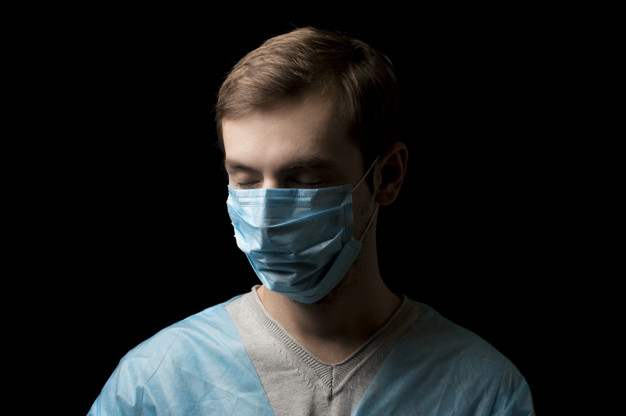

In [5]:
image.load_img(img1) #masked image 

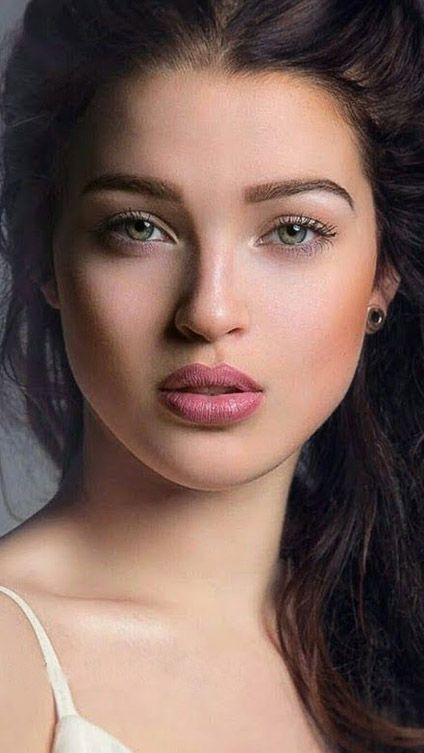

In [6]:
image.load_img(img2) #no mask image

In [7]:
for i in [img1,img2]:
    img = image.load_img(i,target_size=(150,150,3))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    if model.predict_classes(img) == 0:
        print('mask detected')
    else:
        print('no mask detected')

mask detected
no mask detected


In [8]:
import cv2

In [9]:
cap = cv2.VideoCapture(0) # capturing web cam

In [10]:
face_cascade = cv2.CascadeClassifier("C:\\Users\\styli\\AppData\\Local\\Programs\\Python\\Python38\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml")

In [11]:
# detects your masked face from your webcam 

while cap.isOpened():
    _,img = cap.read()
    face = face_cascade.detectMultiScale(img,scaleFactor=1.1,minNeighbors=4)
    
    for x,y,w,h in face:
        face_image = img[y:y+h, x:x+w]
        face_image = cv2.resize(face_image,(150,150))
        face_norm_img = face_image/255
        output = np.expand_dims(face_norm_img,axis=0)
        if model.predict_classes(output) == 0:
            cv2.putText(img,'MASKED FACE',(x-20,y-20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),1)
        elif model.predict_classes(output) == 1:
            cv2.putText(img,'NO MASK',(x-20,y-20),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,0),1)
    
    cv2.imshow('img',img)
    
    if cv2.waitKey(1) & 0xFF ==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()